## Empowering Financial Security
## Detecting Fraudulent Transactions using Advanced Machine Learning Techniques and Predictive Analytics       

## Presented by -- Indrajith S.

### Problem Statement

Develop a machine learning model to detect potentially fraudulent transactions based on the provided features. The dataset contains information about various transactions, including account age, payment method, time of transaction, and category. The goal is to build a classification model that can accurately classify transactions as either legitimate or potentially fraudulent.

### Importing Libraries

In [1]:
# Import Libraries
import pandas as pd
import numpy as np
from datetime import datetime as dt

# Import Visualization Libraries
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Import Sampling
from sklearn.utils import resample

# Import Feature Selection
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

# Import preprocessing libraries
from sklearn.preprocessing import StandardScaler

# Import Model
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import RepeatedStratifiedKFold
import xgboost as xgb

# Import model selection libraries
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV

# Import evaluation metric libraries
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve , auc , classification_report

# Import warnings
import warnings
warnings.filterwarnings('ignore')

### Importing Dataset

In [2]:
data = pd.read_csv('Payment_Data.csv')

### Understanding the data

In [3]:
# Display the first few rows of the dataset
data.head()

,accountAgeDays,numItems,localTime,paymentMethod,paymentMethodAgeDays,Category,isWeekend,label
0,29,1,4.745402,paypal,28.204861,shopping,0.0,0
1,725,1,4.742303,storecredit,0.000000,electronics,0.0,0
2,845,1,4.921318,creditcard,0.000000,food,1.0,0
3,503,1,4.886641,creditcard,0.000000,electronics,1.0,0
4,2000,1,5.040929,creditcard,0.000000,shopping,0.0,0


In [4]:
# Dataset Rows & Columns count
# Checking number of rows and columns of the dataset using shape
print("Number of rows are: ",data.shape[0])
print("Number of columns are: ",data.shape[1])

Number of rows are:  39221
Number of columns are:  8


In [5]:
data.label.value_counts()

label
0    38661
1      560
Name: count, dtype: int64

label
0    38661
1      560
Name: count, dtype: int64
 


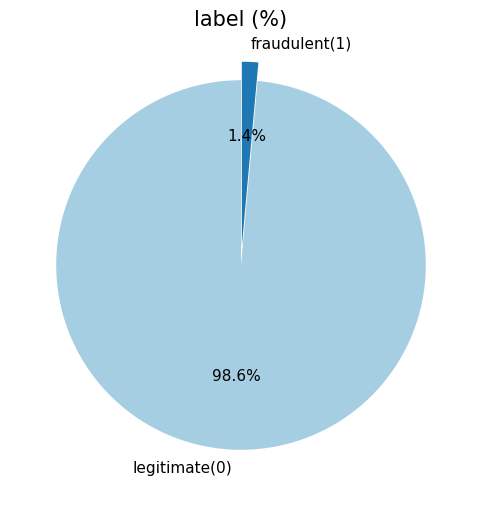

In [6]:
# Distribution of dependent varaible Labels

# Dependant Column Value Counts
print(data.label.value_counts())
print(" ")

colors = sns.color_palette("Paired")

plt.figure(figsize=(10,6))
explode = [0,0.1]
textprops = {'fontsize':11}
plt.pie(data['label'].value_counts(), labels=["legitimate(0)" , "fraudulent(1)" ], startangle=90, colors=colors, explode = explode, autopct="%1.1f%%",textprops = textprops)
plt.title('label (%)', fontsize=15)
plt.show()

In [7]:
data.isWeekend.value_counts()

isWeekend
0.0    19348
1.0    19313
Name: count, dtype: int64

In [8]:
weekend_data = data[data['isWeekend'] == 1.0]
weekend_data

,accountAgeDays,numItems,localTime,paymentMethod,paymentMethodAgeDays,Category,isWeekend,label
2,845,1,4.921318,creditcard,0.000000,food,1.0,0
3,503,1,4.886641,creditcard,0.000000,electronics,1.0,0
6,2000,1,4.921349,paypal,0.000000,electronics,1.0,0
9,4,1,4.461622,creditcard,0.000000,shopping,1.0,0
14,23,1,4.745402,creditcard,0.001389,shopping,1.0,0
...,...,...,...,...,...,...,...,...
39211,2000,1,4.886641,creditcard,0.000000,shopping,1.0,0
39212,2000,1,5.040929,creditcard,185.286806,shopping,1.0,0
39214,101,2,4.524580,storecredit,100.746528,shopping,1.0,0
39218,1591,1,4.742303,creditcard,0.000000,shopping,1.0,0


In [9]:
data.columns

Index(['accountAgeDays', 'numItems', 'localTime', 'paymentMethod',
       'paymentMethodAgeDays', 'Category', 'isWeekend', 'label'],
      dtype='object')

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39221 entries, 0 to 39220
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   accountAgeDays        39221 non-null  int64  
 1   numItems              39221 non-null  int64  
 2   localTime             39221 non-null  float64
 3   paymentMethod         39221 non-null  object 
 4   paymentMethodAgeDays  39221 non-null  float64
 5   Category              39126 non-null  object 
 6   isWeekend             38661 non-null  float64
 7   label                 39221 non-null  int64  
dtypes: float64(3), int64(3), object(2)
memory usage: 2.4+ MB


In [11]:
# Basic statistics of the dataset
data.describe()

,accountAgeDays,numItems,localTime,paymentMethodAgeDays,isWeekend,label
count,39221.000000,39221.000000,39221.000000,39221.000000,38661.000000,39221.000000
mean,857.563984,1.084751,4.748232,122.641326,0.499547,0.014278
std,804.788212,0.566899,0.389360,283.569177,0.500006,0.118636
min,1.000000,1.000000,0.421214,0.000000,0.000000,0.000000
25%,72.000000,1.000000,4.742303,0.000000,0.000000,0.000000
50%,603.000000,1.000000,4.886641,0.012500,0.000000,0.000000
75%,1804.000000,1.000000,4.962055,87.510417,1.000000,0.000000
max,2000.000000,29.000000,5.040929,1999.580556,1.000000,1.000000


In [12]:
# find the uniqueness in the dataset
for i in data.columns:
    print("The no.of unique values in",i,"are: ",data.loc[:,i].nunique())

The no.of unique values in accountAgeDays are:  1999
The no.of unique values in numItems are:  14
The no.of unique values in localTime are:  25
The no.of unique values in paymentMethod are:  3
The no.of unique values in paymentMethodAgeDays are:  17094
The no.of unique values in Category are:  3
The no.of unique values in isWeekend are:  2
The no.of unique values in label are:  2


In [13]:
data.isnull().sum()

accountAgeDays            0
numItems                  0
localTime                 0
paymentMethod             0
paymentMethodAgeDays      0
Category                 95
isWeekend               560
label                     0
dtype: int64

#### There are missing values in 2 columns Category and isWeekend

In [14]:
data['label'].unique()

array([0, 1], dtype=int64)

In [15]:
data.head()

,accountAgeDays,numItems,localTime,paymentMethod,paymentMethodAgeDays,Category,isWeekend,label
0,29,1,4.745402,paypal,28.204861,shopping,0.0,0
1,725,1,4.742303,storecredit,0.000000,electronics,0.0,0
2,845,1,4.921318,creditcard,0.000000,food,1.0,0
3,503,1,4.886641,creditcard,0.000000,electronics,1.0,0
4,2000,1,5.040929,creditcard,0.000000,shopping,0.0,0


In [16]:
data.numItems.value_counts()

numItems
1     37398
2      1348
5       168
3       164
10       71
4        42
6        15
8         5
7         5
12        1
15        1
29        1
9         1
11        1
Name: count, dtype: int64

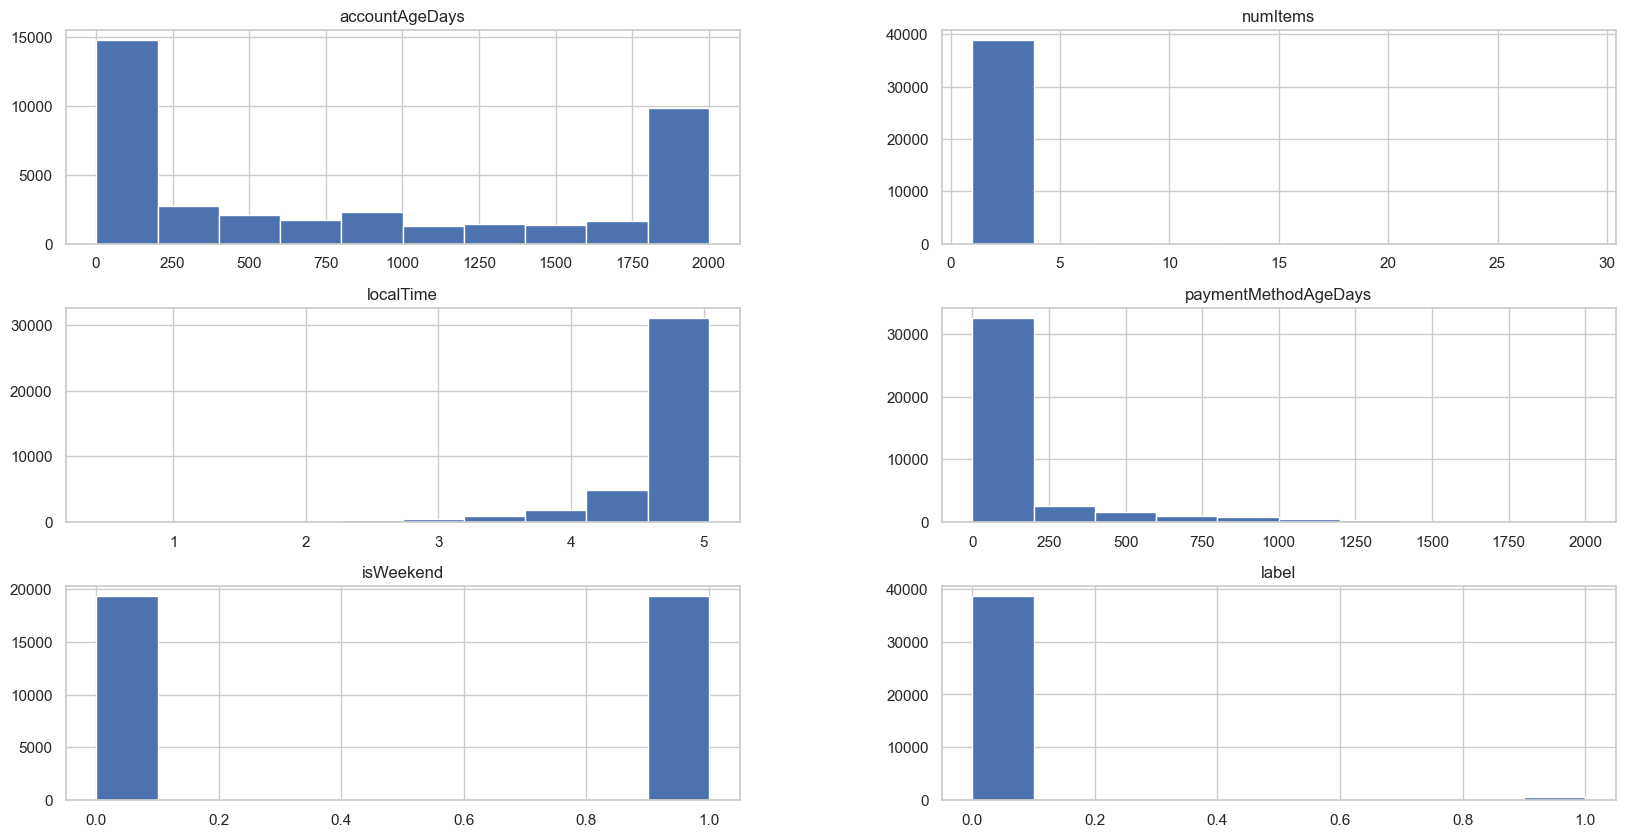

In [17]:
sns.set(style="whitegrid")
data.hist(figsize=(20, 10))
plt.show()

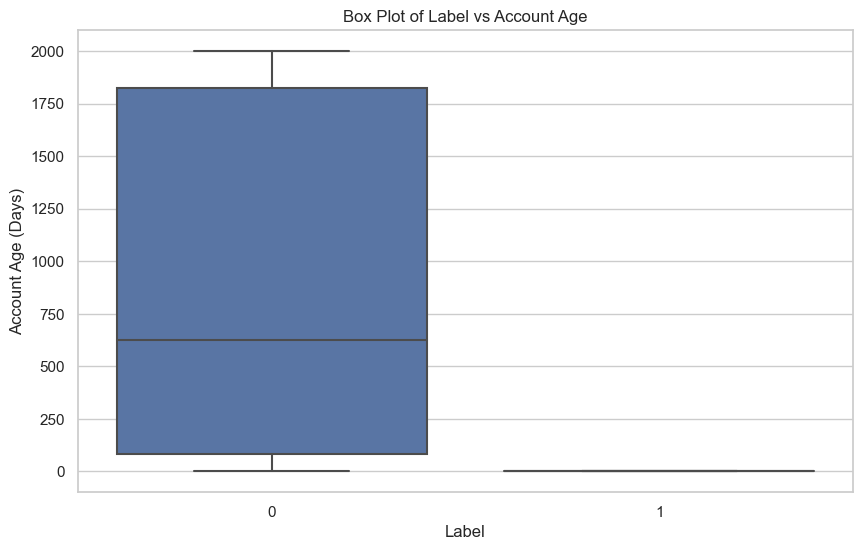

In [18]:

plt.figure(figsize=(10, 6))
sns.boxplot(x="label", y="accountAgeDays", data=data)

plt.xlabel("Label")
plt.ylabel("Account Age (Days)")
plt.title("Box Plot of Label vs Account Age")
plt.show()


In [19]:
# checking the columns 'label' and 'accountAgeDays'
label_1 = data[data['label'] == 1]
label_1


,accountAgeDays,numItems,localTime,paymentMethod,paymentMethodAgeDays,Category,isWeekend,label
109,1,4,4.836982,creditcard,0.000000,electronics,NaN,1
243,1,1,4.836982,paypal,0.002778,electronics,NaN,1
280,1,1,4.921318,creditcard,0.000000,shopping,NaN,1
362,1,1,4.524580,paypal,0.000000,food,NaN,1
420,1,1,4.748314,paypal,0.000000,food,NaN,1
...,...,...,...,...,...,...,...,...
38830,1,2,4.876771,creditcard,0.000000,NaN,NaN,1
38880,1,1,4.876771,creditcard,0.000000,NaN,NaN,1
39005,1,1,4.505662,creditcard,0.000000,NaN,NaN,1
39111,1,3,4.748314,creditcard,0.025000,NaN,NaN,1


In [20]:
# Filter to see only rows where both 'accountAgeDays' and 'label' are 1
Acc_age_df = data[(data['accountAgeDays'] == 1) & (data['label'] == 1)]
pd.set_option('display.max_rows', None)
Acc_age_df


,accountAgeDays,numItems,localTime,paymentMethod,paymentMethodAgeDays,Category,isWeekend,label
109,1,4,4.836982,creditcard,0.000000,electronics,NaN,1
243,1,1,4.836982,paypal,0.002778,electronics,NaN,1
280,1,1,4.921318,creditcard,0.000000,shopping,NaN,1
362,1,1,4.524580,paypal,0.000000,food,NaN,1
420,1,1,4.748314,paypal,0.000000,food,NaN,1
422,1,1,4.745402,creditcard,0.003472,electronics,NaN,1
461,1,1,4.921318,creditcard,0.000000,food,NaN,1
504,1,1,4.921349,creditcard,0.007639,electronics,NaN,1
578,1,2,4.505662,creditcard,0.000000,electronics,NaN,1
648,1,1,4.895263,paypal,0.007639,shopping,NaN,1


#### It clearly shows that when the column account age days is 1 the target variable will be fraud

In [21]:
data.label.value_counts()

label
0    38661
1      560
Name: count, dtype: int64

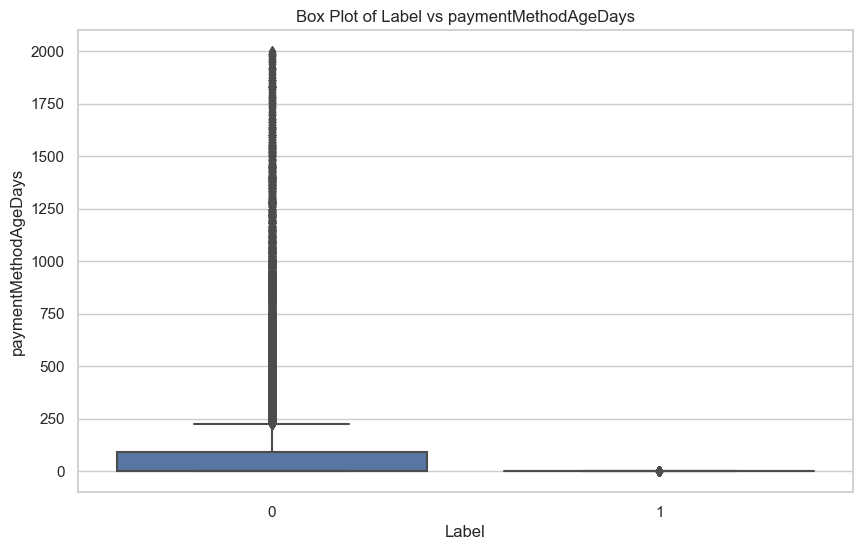

In [22]:

plt.figure(figsize=(10, 6))
sns.boxplot(x="label", y="paymentMethodAgeDays", data=data)

plt.xlabel("Label")
plt.ylabel("paymentMethodAgeDays")
plt.title("Box Plot of Label vs paymentMethodAgeDays")
plt.show()


In [66]:
Payment_age_df = data[(data['paymentMethodAgeDays'] <= 0) & (data['label'] == 1)]

Payment_age_df

,accountAgeDays,numItems,localTime,paymentMethodAgeDays,isWeekend,label,paymentMethod_creditcard,paymentMethod_paypal,paymentMethod_storecredit,Category_electronics,Category_food,Category_shopping,Category_unknown
109,1,4,4.836982,0.0,0,1,True,False,False,True,False,False,False
280,1,1,4.921318,0.0,0,1,True,False,False,False,False,True,False
362,1,1,4.524580,0.0,0,1,False,True,False,False,True,False,False
420,1,1,4.748314,0.0,0,1,False,True,False,False,True,False,False
461,1,1,4.921318,0.0,0,1,True,False,False,False,True,False,False
578,1,2,4.505662,0.0,0,1,True,False,False,True,False,False,False
884,1,2,4.524580,0.0,0,1,True,False,False,False,True,False,False
1190,1,1,4.876771,0.0,0,1,True,False,False,True,False,False,False
1498,1,1,3.066058,0.0,0,1,True,False,False,False,False,True,False
1762,1,1,5.017904,0.0,0,1,False,True,False,False,False,True,False


In [24]:
Pay = data[(data['Category'].notnull()) & (data['label'] == 1)]
Pay

,accountAgeDays,numItems,localTime,paymentMethod,paymentMethodAgeDays,Category,isWeekend,label
109,1,4,4.836982,creditcard,0.000000,electronics,NaN,1
243,1,1,4.836982,paypal,0.002778,electronics,NaN,1
280,1,1,4.921318,creditcard,0.000000,shopping,NaN,1
362,1,1,4.524580,paypal,0.000000,food,NaN,1
420,1,1,4.748314,paypal,0.000000,food,NaN,1
422,1,1,4.745402,creditcard,0.003472,electronics,NaN,1
461,1,1,4.921318,creditcard,0.000000,food,NaN,1
504,1,1,4.921349,creditcard,0.007639,electronics,NaN,1
578,1,2,4.505662,creditcard,0.000000,electronics,NaN,1
648,1,1,4.895263,paypal,0.007639,shopping,NaN,1


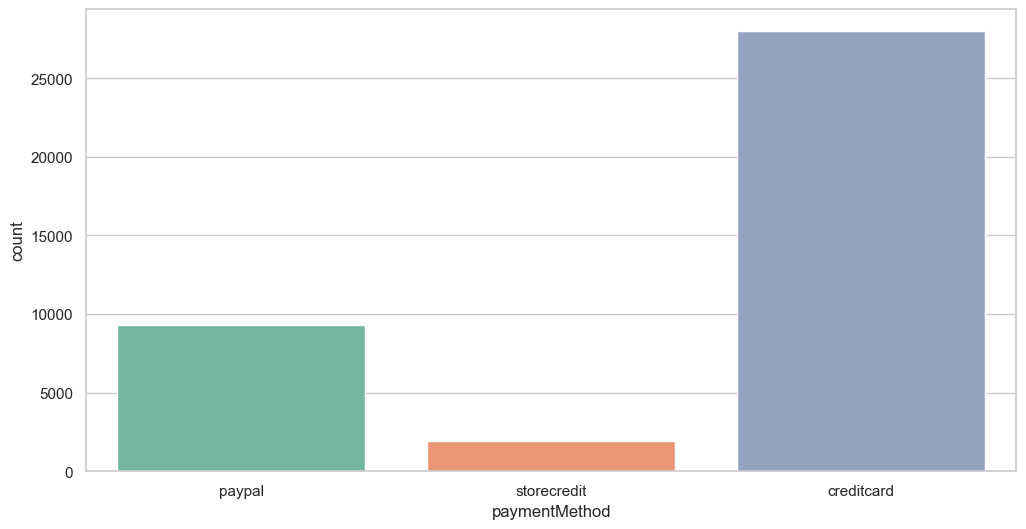

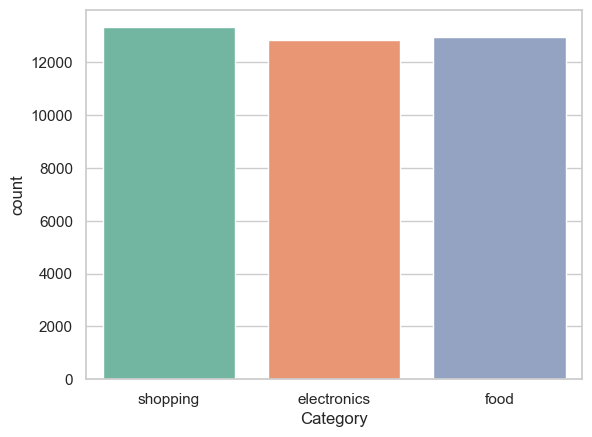

In [25]:
plt.figure(figsize=(12, 6))
for column in data.select_dtypes(include='object'):
    sns.countplot(x=column, data=data, palette="Set2")
    plt.show()

(array([    0.,  5000., 10000., 15000., 20000., 25000., 30000.]),
 [Text(0, 0.0, '0'),
  Text(0, 5000.0, '5000'),
  Text(0, 10000.0, '10000'),
  Text(0, 15000.0, '15000'),
  Text(0, 20000.0, '20000'),
  Text(0, 25000.0, '25000'),
  Text(0, 30000.0, '30000')])

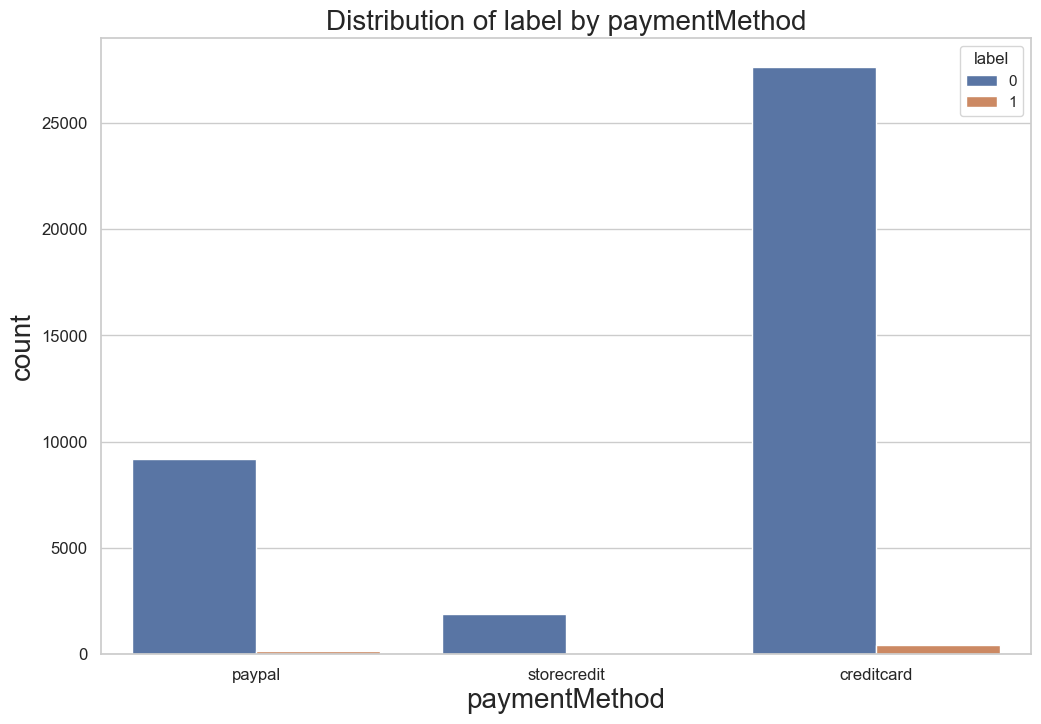

In [26]:
plt.figure(figsize=(12,8), facecolor='w')
sns.countplot(x='paymentMethod', hue='label', data=data)
plt.title("Distribution of label by paymentMethod", size=20)
plt.xlabel("paymentMethod", size=20)
plt.ylabel("count", size=20)
plt.xticks(size=12)
plt.yticks(size=12)

(array([    0.,  2000.,  4000.,  6000.,  8000., 10000., 12000., 14000.]),
 [Text(0, 0.0, '0'),
  Text(0, 2000.0, '2000'),
  Text(0, 4000.0, '4000'),
  Text(0, 6000.0, '6000'),
  Text(0, 8000.0, '8000'),
  Text(0, 10000.0, '10000'),
  Text(0, 12000.0, '12000'),
  Text(0, 14000.0, '14000')])

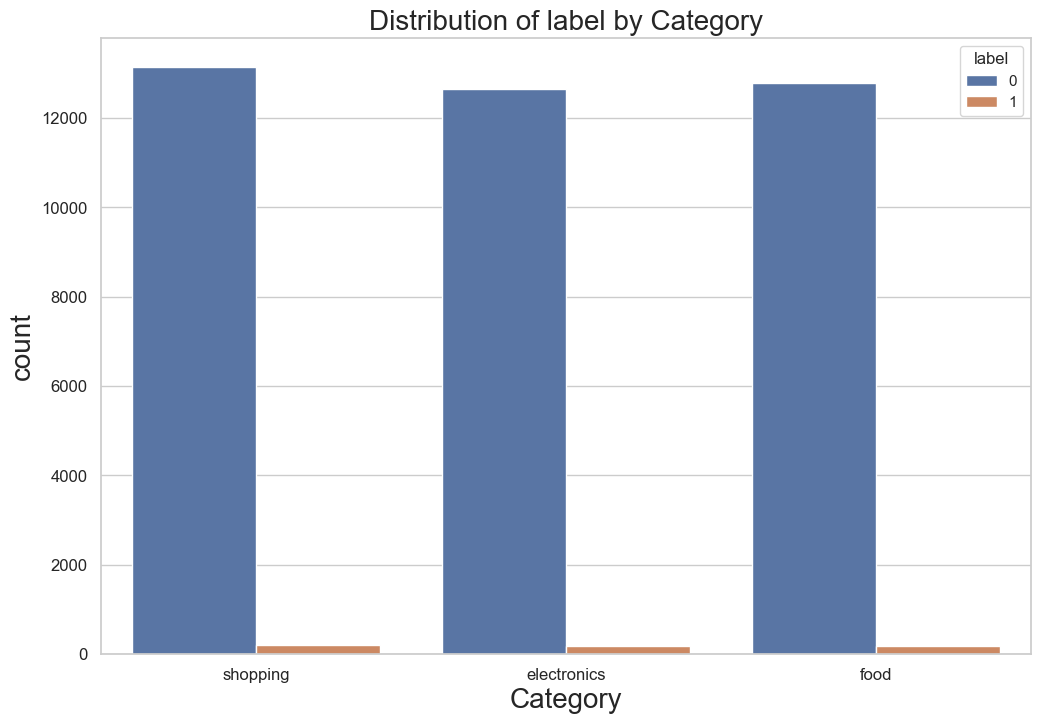

In [27]:
plt.figure(figsize=(12,8), facecolor='w')
sns.countplot(x='Category', hue='label', data=data)
plt.title("Distribution of label by Category", size=20)
plt.xlabel("Category", size=20)
plt.ylabel("count", size=20)
plt.xticks(size=12)
plt.yticks(size=12)

#### Data Preprocessing

Clean and preprocess the data by handling missing values and encoding categorical variables.

In [28]:
# Handle missing values
data['Category'].fillna('unknown', inplace=True)
data['isWeekend'].fillna(data['isWeekend'].mode()[0], inplace=True)

In [29]:
# Converting the isWeekend column to integers (0 and 1)
data['isWeekend'] = data['isWeekend'].astype(int)

In [30]:
# Encoding categorical variables
data = pd.get_dummies(data, columns=['paymentMethod', 'Category'])

In [31]:
# data information after preprocessing
print("Data Info After Preprocessing:")
data.info()

Data Info After Preprocessing:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39221 entries, 0 to 39220
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   accountAgeDays             39221 non-null  int64  
 1   numItems                   39221 non-null  int64  
 2   localTime                  39221 non-null  float64
 3   paymentMethodAgeDays       39221 non-null  float64
 4   isWeekend                  39221 non-null  int32  
 5   label                      39221 non-null  int64  
 6   paymentMethod_creditcard   39221 non-null  bool   
 7   paymentMethod_paypal       39221 non-null  bool   
 8   paymentMethod_storecredit  39221 non-null  bool   
 9   Category_electronics       39221 non-null  bool   
 10  Category_food              39221 non-null  bool   
 11  Category_shopping          39221 non-null  bool   
 12  Category_unknown           39221 non-null  bool   
dtypes: bool(7), flo

In [32]:
data.columns

Index(['accountAgeDays', 'numItems', 'localTime', 'paymentMethodAgeDays',
       'isWeekend', 'label', 'paymentMethod_creditcard',
       'paymentMethod_paypal', 'paymentMethod_storecredit',
       'Category_electronics', 'Category_food', 'Category_shopping',
       'Category_unknown'],
      dtype='object')

In [33]:
data.isna().sum()

accountAgeDays               0
numItems                     0
localTime                    0
paymentMethodAgeDays         0
isWeekend                    0
label                        0
paymentMethod_creditcard     0
paymentMethod_paypal         0
paymentMethod_storecredit    0
Category_electronics         0
Category_food                0
Category_shopping            0
Category_unknown             0
dtype: int64

In [34]:
Weekend = data[(data['isWeekend'] == 0) & (data['label'] == 1)]

Weekend

,accountAgeDays,numItems,localTime,paymentMethodAgeDays,isWeekend,label,paymentMethod_creditcard,paymentMethod_paypal,paymentMethod_storecredit,Category_electronics,Category_food,Category_shopping,Category_unknown
109,1,4,4.836982,0.000000,0,1,True,False,False,True,False,False,False
243,1,1,4.836982,0.002778,0,1,False,True,False,True,False,False,False
280,1,1,4.921318,0.000000,0,1,True,False,False,False,False,True,False
362,1,1,4.524580,0.000000,0,1,False,True,False,False,True,False,False
420,1,1,4.748314,0.000000,0,1,False,True,False,False,True,False,False
422,1,1,4.745402,0.003472,0,1,True,False,False,True,False,False,False
461,1,1,4.921318,0.000000,0,1,True,False,False,False,True,False,False
504,1,1,4.921349,0.007639,0,1,True,False,False,True,False,False,False
578,1,2,4.505662,0.000000,0,1,True,False,False,True,False,False,False
648,1,1,4.895263,0.007639,0,1,False,True,False,False,False,True,False


In [35]:
data.isWeekend.value_counts()

isWeekend
0    19908
1    19313
Name: count, dtype: int64

In [36]:
data.head()

,accountAgeDays,numItems,localTime,paymentMethodAgeDays,isWeekend,label,paymentMethod_creditcard,paymentMethod_paypal,paymentMethod_storecredit,Category_electronics,Category_food,Category_shopping,Category_unknown
0,29,1,4.745402,28.204861,0,0,False,True,False,False,False,True,False
1,725,1,4.742303,0.000000,0,0,False,False,True,True,False,False,False
2,845,1,4.921318,0.000000,1,0,True,False,False,False,True,False,False
3,503,1,4.886641,0.000000,1,0,True,False,False,True,False,False,False
4,2000,1,5.040929,0.000000,0,0,True,False,False,False,False,True,False


### Feature Engineering

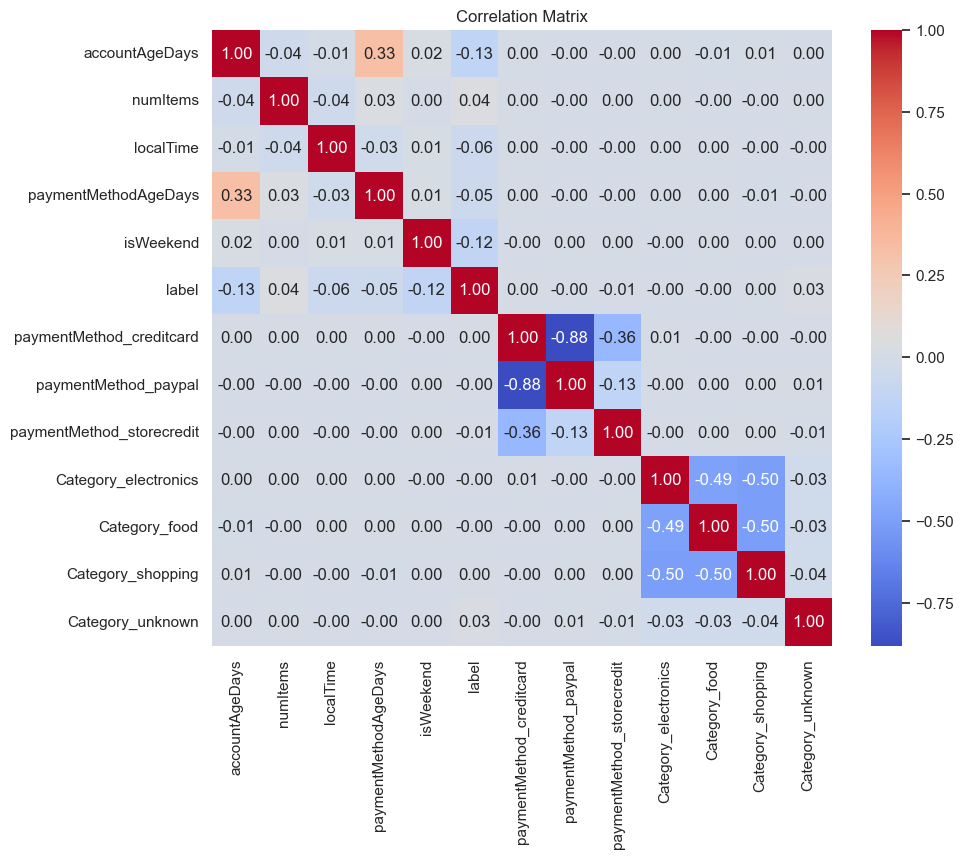

In [37]:
import seaborn as sns

# Calculate the correlation matrix
corr_matrix = data.corr()

# Plot the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')

plt.show()

In [38]:
data['label'].unique()

array([0, 1], dtype=int64)

In [39]:
class_1=data[data['label']==1]
class_0=data[data['label']==0]

In [40]:
# to perform up-sampling of the minority class, ensuring that both classes in the dataset have an equal number of samples
class_1=resample(class_1,replace=True,n_samples=len(class_0),random_state=40)

In [41]:
data_balance=pd.concat([class_0,class_1])
data_balance['label'].value_counts()

label
0    38661
1    38661
Name: count, dtype: int64

In [42]:
data_1=data_balance
np.shape(data_1)

(77322, 13)

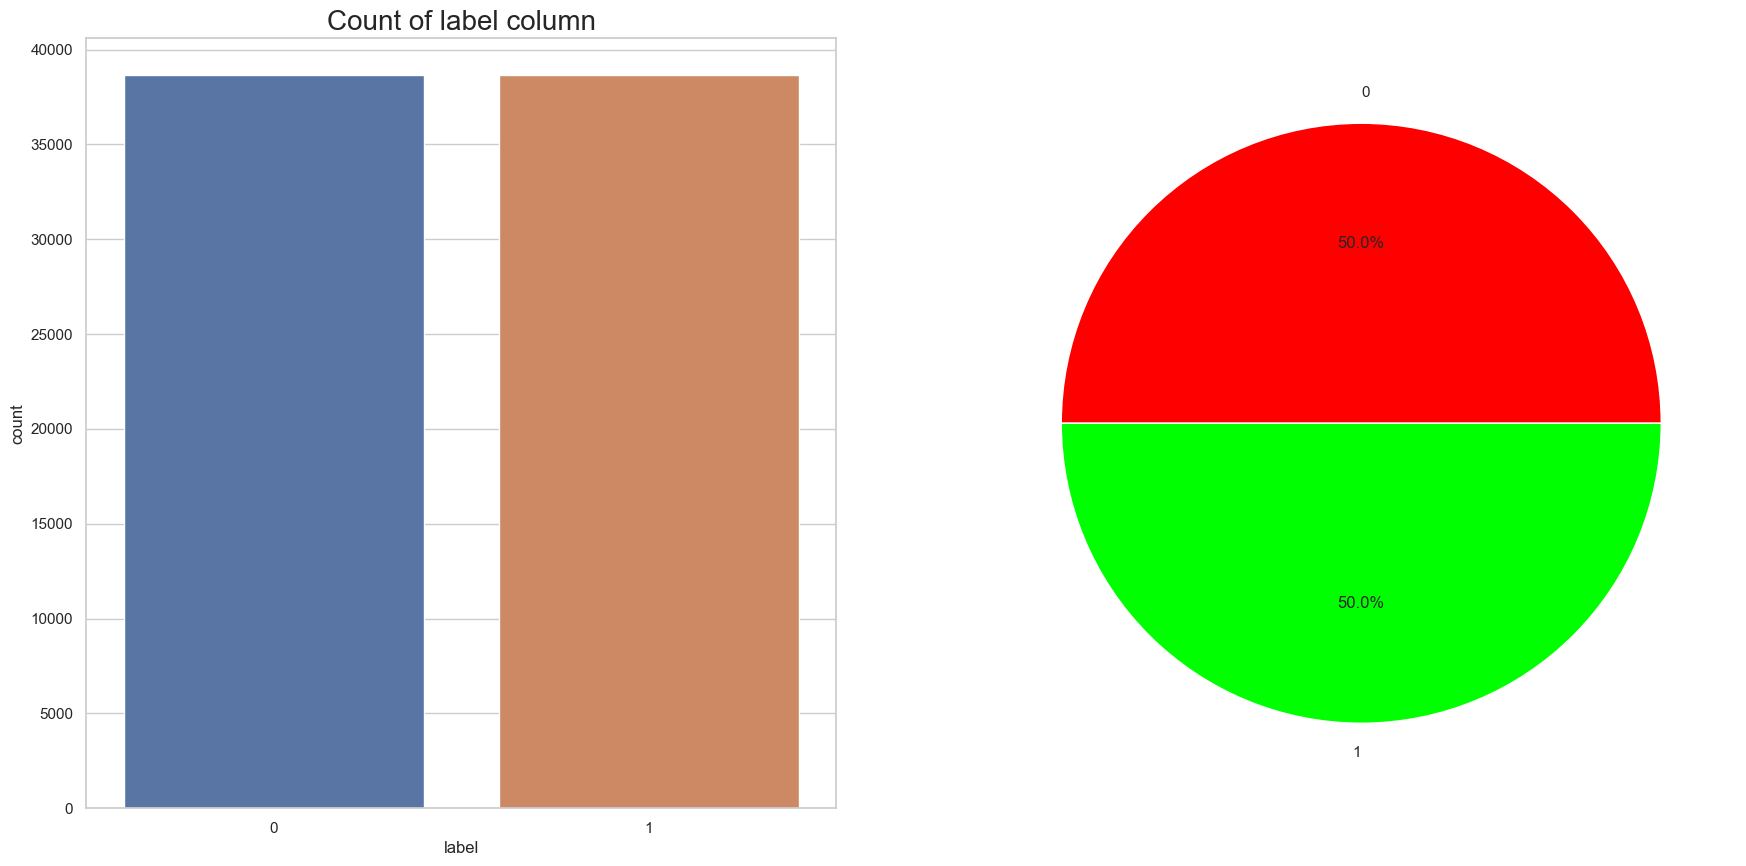

In [43]:
#Distribution of TenYearCHD in the balanced dataset
plt.figure(figsize=(12, 10), facecolor='w')
plt.subplots_adjust(right=1.5)
plt.subplot(121)
sns.countplot(x="label", data=data_1)
plt.title("Count of label column", size=20)
plt.subplot(122)
labels=[0,1]
plt.pie(data_1["label"].value_counts(),autopct="%1.1f%%",labels=labels,colors=["red","lime"])
plt.show()

### Model Selection

In [44]:
# Split the dataset into features and labels
X = data.drop('label', axis=1)
y = data['label']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [45]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [46]:

var_models = {
    "Logistic Regression": LogisticRegression(solver="liblinear", l1_ratio=0.4),
    "K-Nearest Neighbors": KNeighborsClassifier(weights='distance', metric='euclidean'),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(loss="exponential"),
    "AdaBoost Classifier": AdaBoostClassifier(n_estimators=60, learning_rate=0.2),
    "XGBoost Classifier": XGBClassifier(),
}

for name, model in var_models.items():
    model.fit(X_train, y_train)
    print(name + ' was completed.')

Logistic Regression was completed.
K-Nearest Neighbors was completed.
Decision Tree was completed.
Random Forest was completed.
Gradient Boosting was completed.
AdaBoost Classifier was completed.
XGBoost Classifier was completed.


### Model Evaluation

Evaluate the model's performance using relevant metrics like accuracy, precision, recall, and F1-score.

In [47]:
# created a function to give classification report for each model created
def evaluation_report(y_true, y_pred, y_pred_proba):
    """
    This function prints evaluation metrics for a classification model.
        y_true: Actual labels.
        y_pred: Predicted labels.
        y_pred_proba: Predicted probabilities for positive class.
    """
    print("\nClassification Report:")
    print(classification_report(y_true, y_pred))
    print("\nROC AUC Score:")
    print(roc_auc_score(y_true, y_pred_proba))
    fpr, tpr, thresholds = roc_curve(y_true, y_pred_proba)
print("Evaluation on Test Data:")
for name, model in var_models.items():
    print('---------- ' + name + ' ----------')
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)[:, 1]
    evaluation_report(y_test, y_pred, y_pred_proba)
    print()

Evaluation on Test Data:
---------- Logistic Regression ----------

Classification Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      7727
           1       0.00      0.00      0.00       118

    accuracy                           0.98      7845
   macro avg       0.49      0.50      0.50      7845
weighted avg       0.97      0.98      0.98      7845


ROC AUC Score:
0.9693974243956367

---------- K-Nearest Neighbors ----------

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      7727
           1       0.86      0.82      0.84       118

    accuracy                           1.00      7845
   macro avg       0.93      0.91      0.92      7845
weighted avg       1.00      1.00      1.00      7845


ROC AUC Score:
0.9309859989076383

---------- Decision Tree ----------

Classification Report:
              precision    recall  f1-score   support

  

confusion_matrix For Test data:


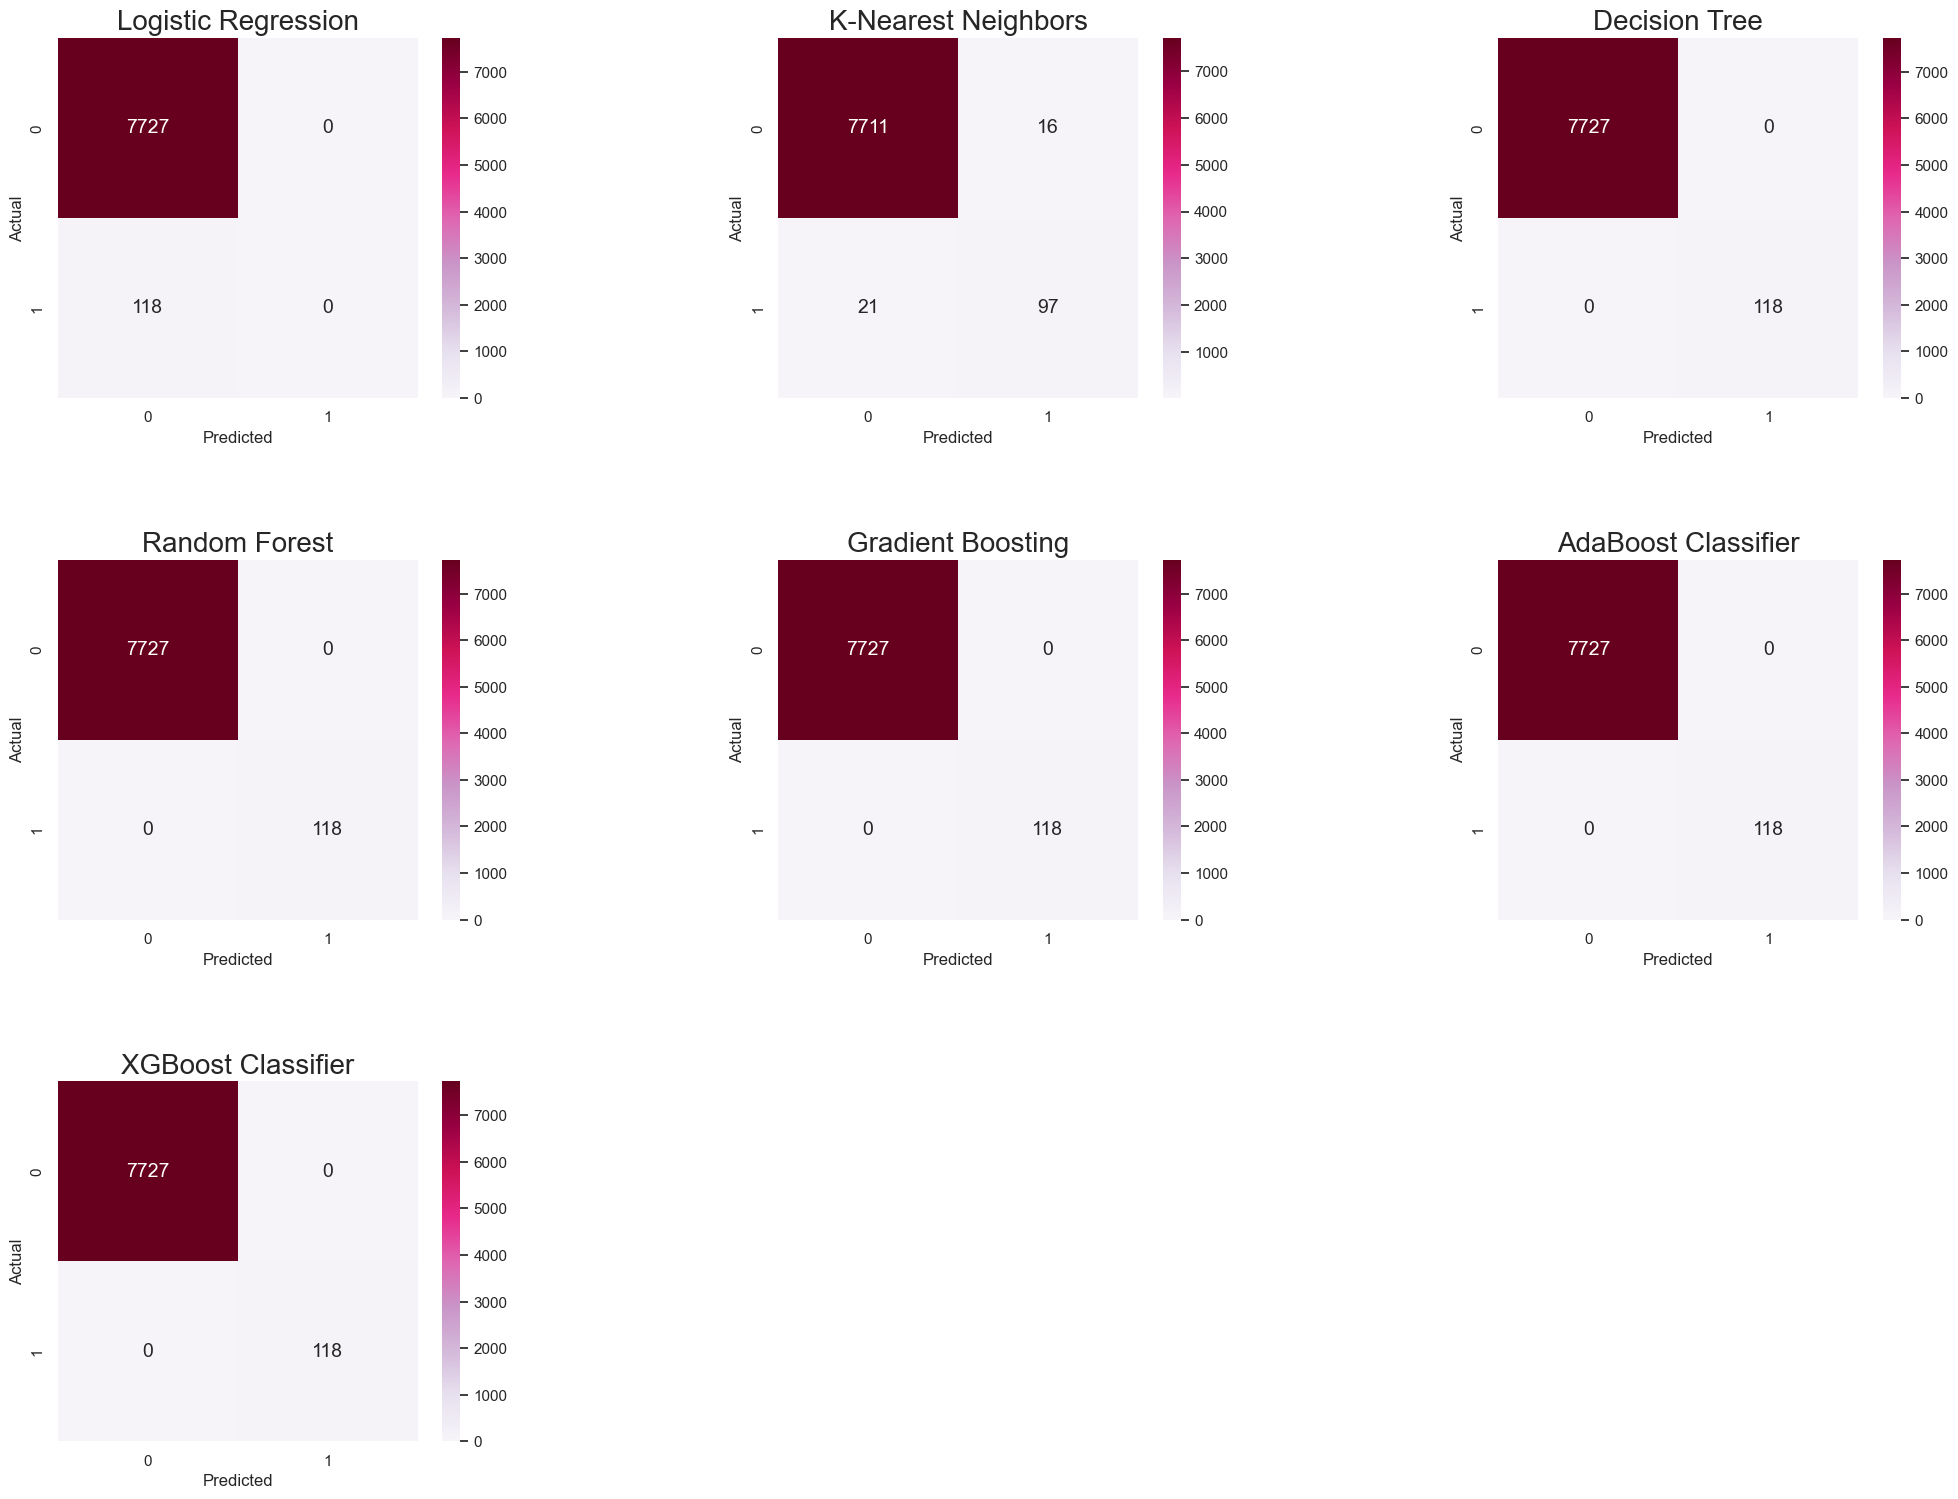

In [48]:
# Plotted a confussion matrix to see the predictions
fig = plt.figure(figsize=(25, 25))
start = 1
print("confusion_matrix For Test data:")
for name, model in var_models.items():
    y_test_pred = model.predict(X_test)
    conf_mx = confusion_matrix(y_test, y_test_pred)

    heat_cm = pd.DataFrame(conf_mx, columns=np.unique(y_test), index=np.unique(y_test))
    heat_cm.index.name = 'Actual'
    heat_cm.columns.name = 'Predicted'

    plt.subplot(4, 3, start)
    fig.subplots_adjust(wspace=0.45, hspace=0.45)
    sns.heatmap(heat_cm, annot=True, fmt='d', square=True, annot_kws={"size": 14}, cmap='PuRd').set_title(name, fontsize=20)
    start += 1

plt.show()


In [49]:
print("Evaluation on Train Data:")
for name, model in var_models.items():
    print('---------- ' + name + ' ----------')
    y_pred_train = model.predict(X_train)
    y_pred_proba_train = model.predict_proba(X_train)[:, 1]
    evaluation_report(y_train, y_pred_train, y_pred_proba_train)

Evaluation on Train Data:
---------- Logistic Regression ----------

Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99     30934
           1       0.00      0.00      0.00       442

    accuracy                           0.99     31376
   macro avg       0.49      0.50      0.50     31376
weighted avg       0.97      0.99      0.98     31376


ROC AUC Score:
0.9697195049919447
---------- K-Nearest Neighbors ----------

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     30934
           1       1.00      1.00      1.00       442

    accuracy                           1.00     31376
   macro avg       1.00      1.00      1.00     31376
weighted avg       1.00      1.00      1.00     31376


ROC AUC Score:
1.0
---------- Decision Tree ----------

Classification Report:
              precision    recall  f1-score   support

           0      

confusion_matrix For Train data:


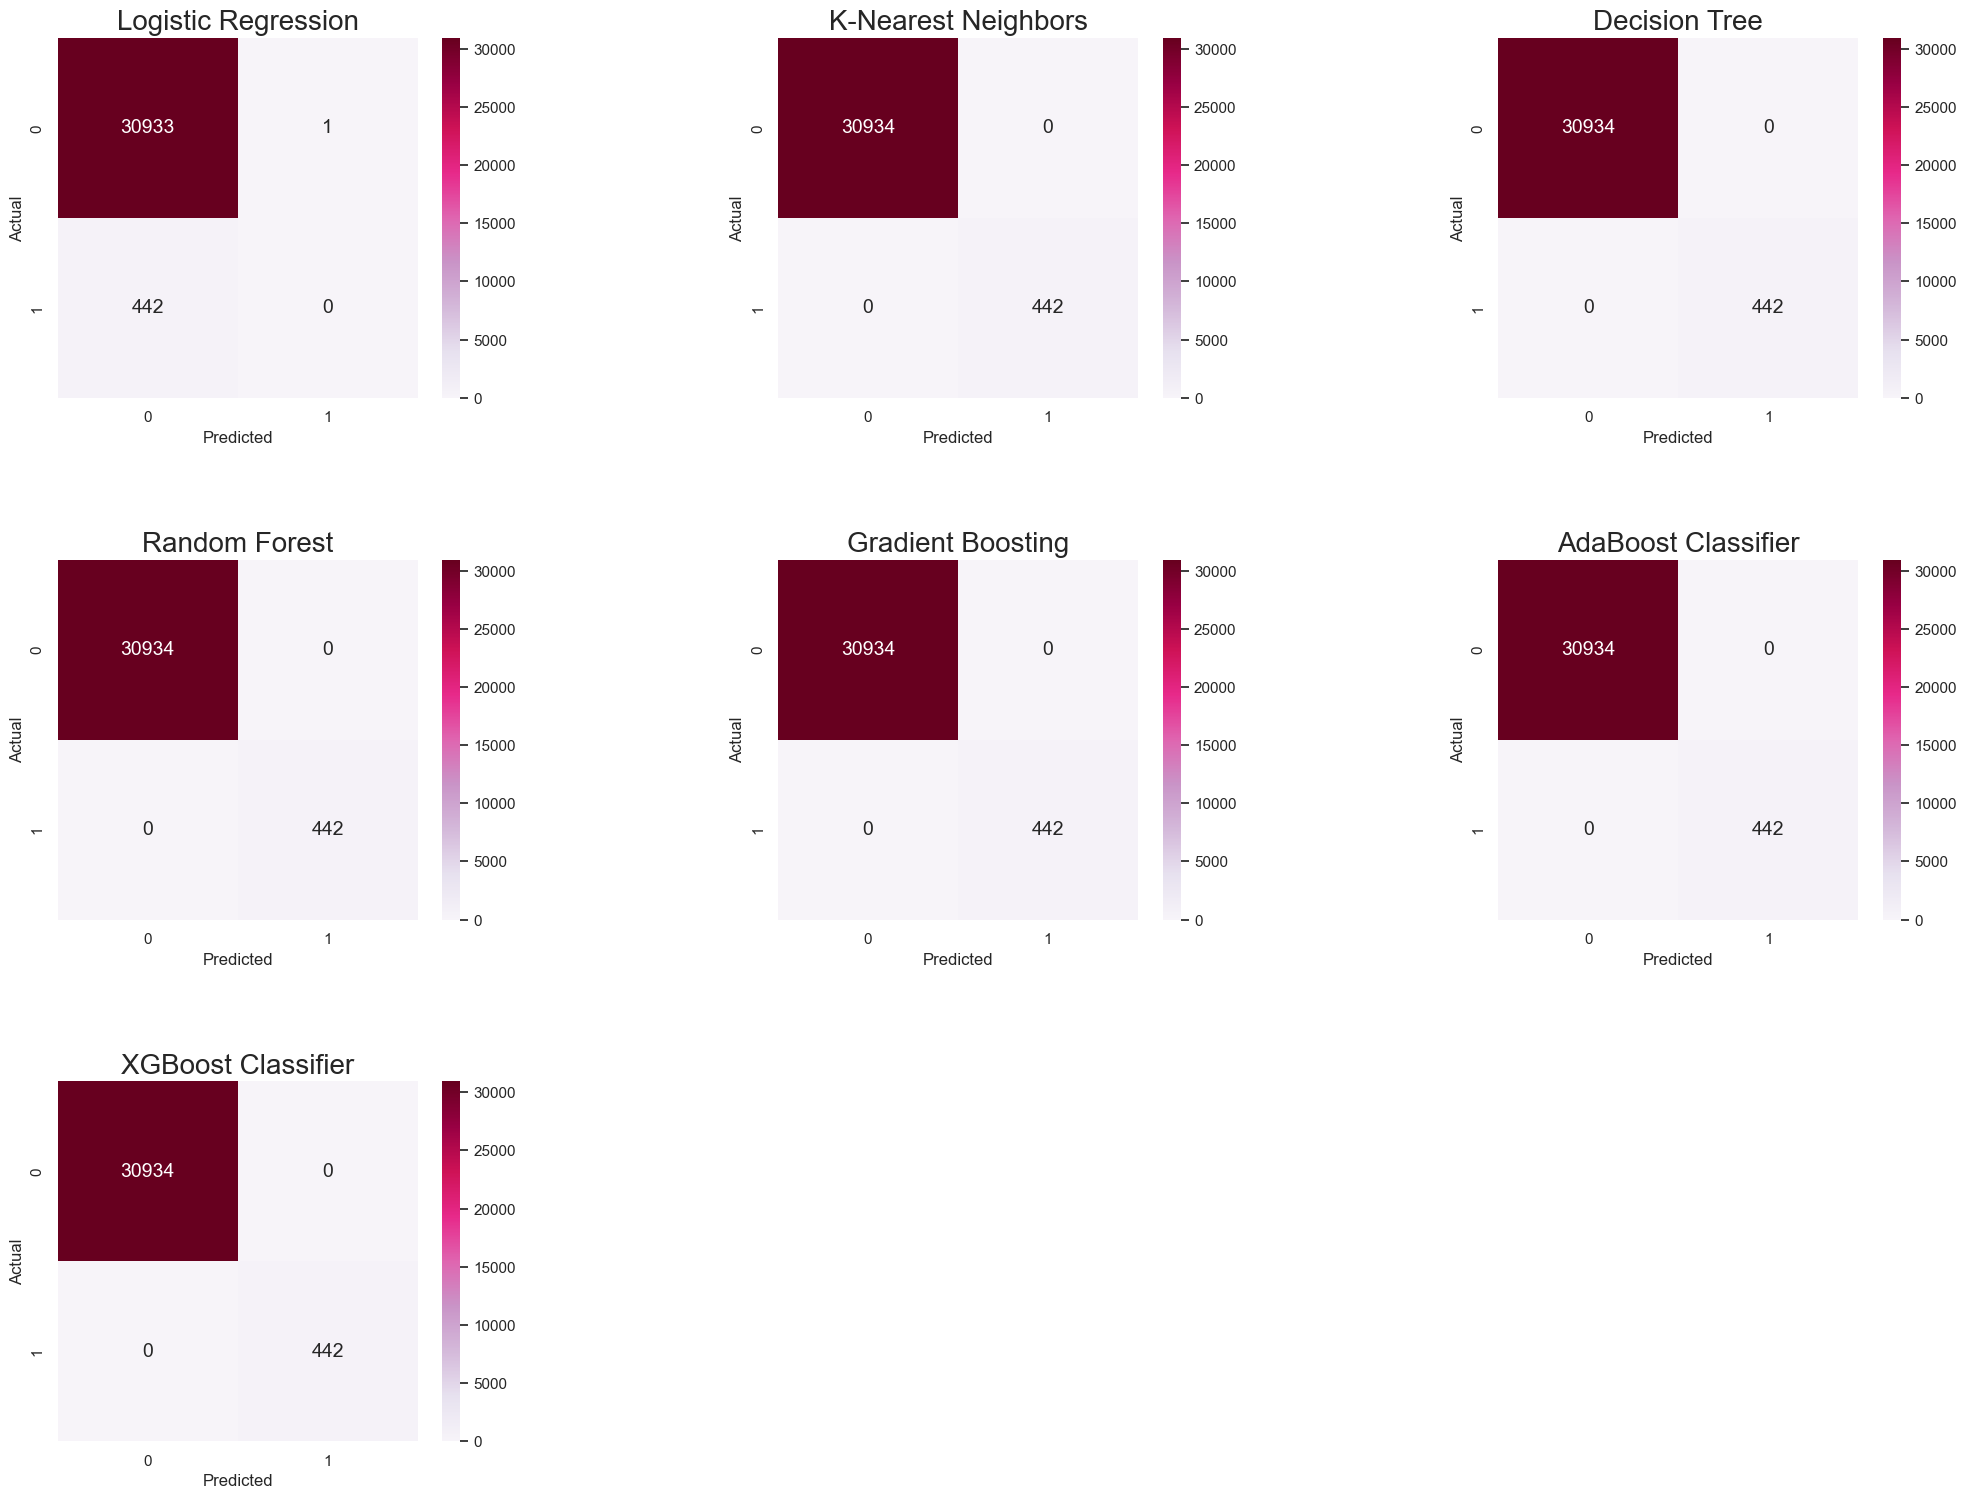

In [50]:
# Similarly for Train data
fig = plt.figure(figsize=(25, 25))
a = 1
print("confusion_matrix For Train data:")

for name, model in var_models.items():
    y_test_pred = model.predict(X_train)
    conf_mx = confusion_matrix(y_train, y_test_pred)
    
    heat_cm = pd.DataFrame(conf_mx, columns=np.unique(y_train), index=np.unique(y_train))
    heat_cm.index.name = 'Actual'
    heat_cm.columns.name = 'Predicted'

    plt.subplot(4, 3, a)
    fig.subplots_adjust(wspace=0.45, hspace=0.45)
    sns.heatmap(heat_cm, annot=True, fmt='d', square=True, annot_kws={"size": 14}, cmap='PuRd').set_title(name, fontsize=20)
    a += 1

plt.show()


In [51]:
import pandas as pd

# Create a dictionary to store the scores
scores = {
    "Model": ["Logistic Regression", "K-Nearest Neighbors", "Decision Tree", "Random Forest", "Gradient Boosting", "AdaBoost Classifier", "XGBoost Classifier"],
    "Accuracy": [0.98, 1.00, 1.00, 1.00, 1.00, 1.00, 1.00],
    "Precision": [0.00, 0.86, 1.00, 1.00, 1.00, 1.00, 1.00],
    "Recall": [0.00, 0.82, 1.00, 1.00, 1.00, 1.00, 1.00],
    "F1-score": [0.00, 0.84, 1.00, 1.00, 1.00, 1.00, 1.00],
    "ROC AUC Score": [0.9693974243956367, 0.9309859989076383, 1.0, 1.0, 1.0, 1.0, 1.0]
}

# Create a DataFrame from the dictionary
scores_df = pd.DataFrame(scores)

# Set Model as index
scores_df.set_index("Model", inplace=True)

scores_df


,Accuracy,Precision,Recall,F1-score,ROC AUC Score
Model,,,,,
Logistic Regression,0.98,0.00,0.00,0.00,0.969397
K-Nearest Neighbors,1.00,0.86,0.82,0.84,0.930986
Decision Tree,1.00,1.00,1.00,1.00,1.000000
Random Forest,1.00,1.00,1.00,1.00,1.000000
Gradient Boosting,1.00,1.00,1.00,1.00,1.000000
AdaBoost Classifier,1.00,1.00,1.00,1.00,1.000000
XGBoost Classifier,1.00,1.00,1.00,1.00,1.000000


## Cross validation method

In [52]:
# CrossValidation method for random forest
from sklearn.model_selection import cross_val_score
rf = RandomForestClassifier()
training_accuracy_rf = cross_val_score(rf, X_train, y_train, cv=10)
print('training_accuracy mean for RF is :' , training_accuracy_rf.mean())
print("********************")
print('training_accuracy max for RF is:' , training_accuracy_rf.max())

training_accuracy mean for RF is : 1.0
********************
training_accuracy max for RF is: 1.0


In [53]:
# Crossvalidation method for Xgboost
xgb = XGBClassifier()
training_accuracy_xgb = cross_val_score(xgb, X_train, y_train, cv=10)
print('training_accuracy mean for Xgboost is :' , training_accuracy_xgb.mean())
print("********************")
print('training_accuracy max for Xgboost is:' , training_accuracy_xgb.max())

training_accuracy mean for Xgboost is : 1.0
********************
training_accuracy max for Xgboost is: 1.0


In [54]:
# Crossvalidation method for Decission tree
dt = DecisionTreeClassifier()
training_accuracy_dt = cross_val_score(dt, X_train, y_train, cv=10)
print('training_accuracy mean for decission tree is :' , training_accuracy_dt.mean())
print("********************")
print('training_accuracy max for decission tree is:' , training_accuracy_dt.max())

training_accuracy mean for decission tree is : 1.0
********************
training_accuracy max for decission tree is: 1.0


In [55]:
Cross_validation_acc = {
    "Random Forest": {
        "training_accuracy mean": 1.0,
        "training_accuracy max": 1.0
    },
    "Xgboost": {
        "training_accuracy mean": 1.0,
        "training_accuracy max": 1.0
    },
    "Decision Tree": {
        "training_accuracy mean": 1.0,
        "training_accuracy max": 1.0
    }
}
df1 = pd.DataFrame.from_dict(Cross_validation_acc, orient='index')
df1

,training_accuracy mean,training_accuracy max
Random Forest,1.0,1.0
Xgboost,1.0,1.0
Decision Tree,1.0,1.0


# ROC Curve

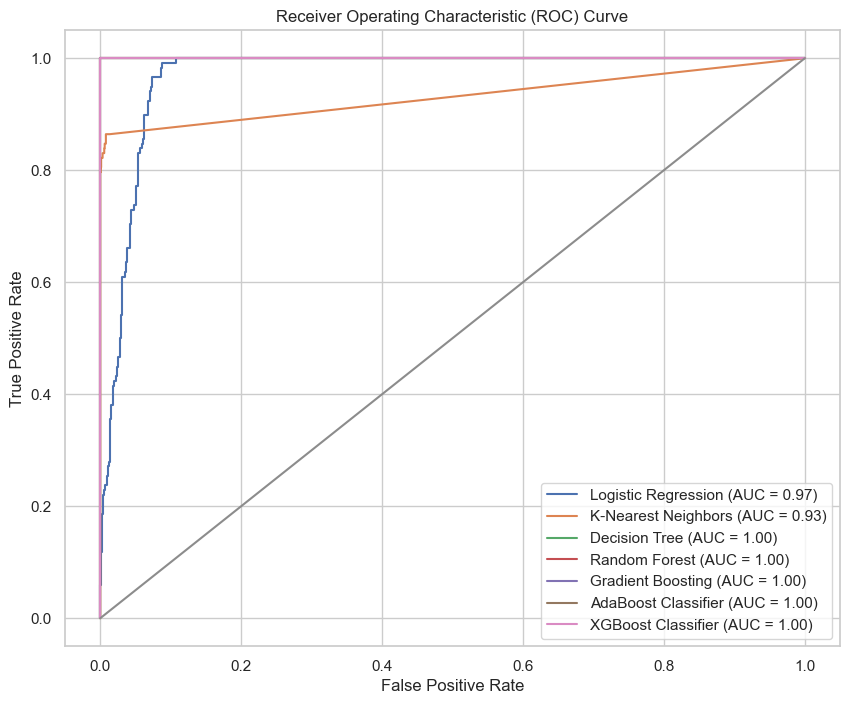

In [56]:
plt.figure(figsize=(10, 8))
# Plot ROC curve for each model
for name, model in var_models.items():
    y_pred_proba = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

# Feature Importance

In [57]:
#Apply SelectKBest and extract top 10 features
best=SelectKBest(score_func=chi2, k=10)

In [58]:
fit=best.fit(X,y)

In [59]:
data_scores=pd.DataFrame(fit.scores_)
data_columns=pd.DataFrame(X.columns)

In [60]:
#Join the two dataframes
scores=pd.concat([data_columns,data_scores],axis=1)
scores.columns=['Feature','Score']
print(scores.nlargest(11,'Score'))

                      Feature          Score
0              accountAgeDays  486056.429265
3        paymentMethodAgeDays   69659.776703
4                   isWeekend     279.746515
11           Category_unknown      33.010906
1                    numItems      16.881186
2                   localTime       4.433934
7   paymentMethod_storecredit       1.486610
10          Category_shopping       0.403686
9               Category_food       0.359664
8        Category_electronics       0.290572
5    paymentMethod_creditcard       0.261753


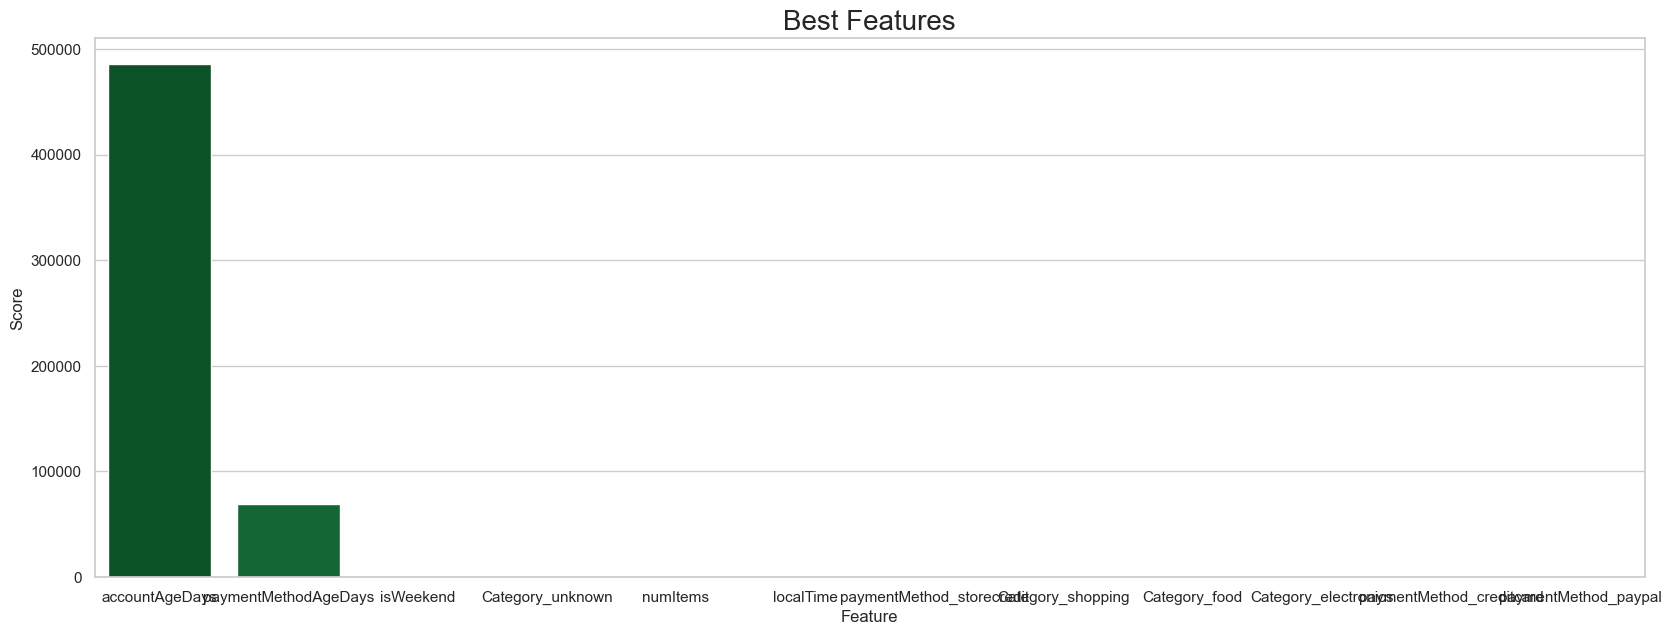

In [61]:
#To visualize feature selection
scores=scores.sort_values(by="Score", ascending=False)
plt.figure(figsize=(20,7), facecolor='w')
sns.barplot(x='Feature',y='Score',data=scores,palette='BuGn_r')
plt.title("Best Features", size=20)
plt.show()

### Hyper parameter tuning

In [63]:
from sklearn.datasets import make_classification
# Split the dataset into features and labels
X1 = data.drop('label', axis=1)
y1 = data['label']

X1, y1 = make_classification(n_samples=1000, n_features=20, random_state=42)

# Split data into train and test sets
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.2, random_state=42)

# Define the parameter grid
param_grid = {
    'max_depth': [None, 10, 20],
    'min_samples_leaf': [1, 2, 4],
    'min_samples_split': [2, 5, 10],
    'n_estimators': [50, 100, 200]
}

# Initialize the RandomForestClassifier
rf_clf = RandomForestClassifier(random_state=42)

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=rf_clf, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Perform hyperparameter tuning
grid_search.fit(X1_train, y1_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Use the best model to make predictions
best_rf_clf = grid_search.best_estimator_
y_pred = best_rf_clf.predict(X1_test)


Best Hyperparameters: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 50}


In [64]:
# Calculating the accuracy score
accuracy = accuracy_score(y1_test, y_pred)
print("Accuracy:", accuracy)
report = classification_report(y1_test, y_pred)
# classification report
print("Classification Report:")
print(report)

Accuracy: 0.885
Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.94      0.88        93
           1       0.94      0.84      0.89       107

    accuracy                           0.89       200
   macro avg       0.89      0.89      0.88       200
weighted avg       0.89      0.89      0.89       200



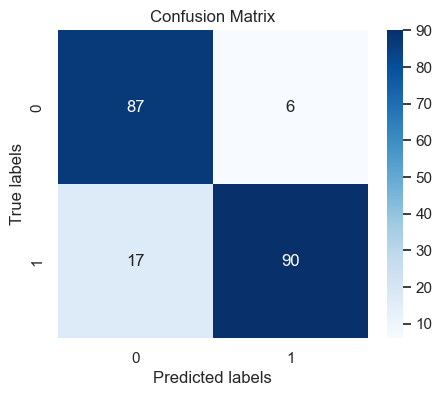

In [65]:
# confusion matrix
conf_matrix = confusion_matrix(y1_test, y_pred)

plt.figure(figsize=(5, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()
